In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
orbit_period  = 1.55 # hours
sunlit_period = 0.95 # hours

solar_power   = 1.90 # W

init_charge_period = 10.0 # hours

magsail_cycle      = 1.55 # hours
magsail_on_hours   = 1.55 # hours

magsail_cycle_long = 72 # hours
magsail_on_long    = 60 # hours

magsail_power      = 0.75
OBH_power          = 0.3
TX_power           = 0.2
RX_power           = 0.0
EPS_power          = 0.1


transmitter_cycle    = 60.0/3600.0
transmitter_on_hours =  0.5/3600.0 # hours

receiver_cycle       = 60.0/3600.0
receiver_on_hours =  1.0/3600.0 # hours

gps_cycle           = 1.0
gps_on_hours        = 3.0/60.0

gps_power    = 0.15

simulate_orbits      = 200.0
N                    = 100001

sim_time             = simulate_orbits*orbit_period

E0                   = 0.0 # Wh"

battery_Wh           = 3.7

In [4]:
def P_GEN(t):
    
    if t%orbit_period<sunlit_period:
        return solar_power 
    else:
        return 0

In [5]:
def P_MAG(t):
    
    if t < init_charge_period:
        return 0
    
    #elif t%1.55 < 1.15:
    #    return 3.0
    
    else:
        if t%magsail_cycle < magsail_on_hours:
            return magsail_power
        else:
            return 0.0

In [6]:
def P_OBH(t):
    if t < init_charge_period:
        return 0
    
    return OBH_power 

In [7]:
def P_TXO(t):
    
    if t%transmitter_cycle < transmitter_on_hours:
        return TX_power
    else:
        return 0

In [8]:
def P_RXO(t):
    if t%receiver_cycle < receiver_on_hours:
        return RX_power
    else:
        return 0

In [9]:
def P_EPS(t):
    if t < init_charge_period:
        return 0
    
    return EPS_power

In [10]:
def P_GPS(t):
    
    if t%gps_cycle < gps_on_hours:
        return gps_power
    else:
        return 0

In [11]:
def f(t):
    
    dydt = P_GEN(t) - P_MAG(t) - P_OBH(t) - P_TXO(t) - P_RXO(t) - P_EPS(t) - P_GPS(t)
    
    return dydt

In [12]:
def solve_battery_level(E0, t_hours, N):
    
    t = np.linspace(0,t_hours, N)
    E = np.zeros(N)
    
    dt = t_hours/N
    
    E[0] = E0
    
    
    for i in range(0,N-1):
        
        E[i+1] = E[i] + f(t[i])*dt
        
        if E[i+1] > battery_Wh:
            E[i+1] = battery_Wh
        elif E[i+1] < 0:
            E[i+1] = 0
        
    
    return t, E

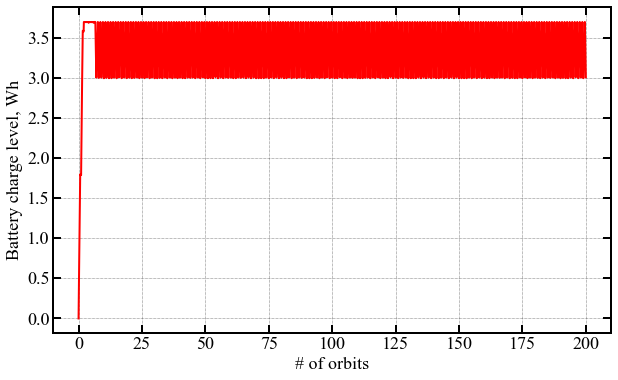

In [14]:
t0, E = solve_battery_level(E0, sim_time, N)

plt.figure(figsize=(10,6))
plt.plot(t0/orbit_period, E, color='r', linewidth=2.0)

N = 100001

P_MAG1 = np.zeros(N)

for i in range(0,N):
    P_MAG1[i] = P_MAG(t0[i])*2.0
    
#plt.plot(t0/orbit_period, P_MAG1-1, marker='o', markerfacecolor='None', markeredgecolor='m',linestyle = 'None', linewidth=1.0)


plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

ax = plt.gca()

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')

ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)


ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.5)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

plt.xlabel('# of orbits', fontsize=18)
plt.ylabel('Battery charge level, Wh', fontsize=18)

#plt.ylim([-0.0,4.0])
#plt.legend(loc='upper left', fontsize=18,  framealpha=0)
#plt.xlim([20,40])


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
#plt.savefig('../new_plots/battery-discharge-06-3.6Wh.png', dpi=300,bbox_inches='tight')
#plt.savefig('../new_plots/battery-discharge-06-3.6Wh.pdf', dpi=300,bbox_inches='tight')
#plt.savefig('../new_plots/battery-discharge-06-3.6Wh.eps', dpi=300,bbox_inches='tight')